# 📊 NexoCommerce - Análise Exploratória de Dados

**Objetivo:** Explorar e entender os dados de produtos do marketplace

**Conteúdo:**
1. Carregamento dos dados
2. Análise descritiva
3. Visualizações
4. Identificação de padrões
5. Feature engineering

---

In [1]:
# Imports
import sys
import os
from pathlib import Path

# Add src to path
sys.path.append(str(Path.cwd().parent))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Imports realizados com sucesso!")

✅ Imports realizados com sucesso!


## 1️⃣ Carregamento dos Dados

In [3]:
from src.pipeline.data_loader import DataLoader

# Inicializar loader
loader = DataLoader()

# Opção 1: Dados sintéticos (para teste rápido)
df = loader.load_data(source="synthetic", n_samples=1000)

# Opção 2: Dados do Kaggle (descomente para usar)
# df = loader.load_data(
#     source="kaggle",
#     dataset_name="aimlveera/counterfeit-product-detection-dataset"
# )

# Opção 3: Dados locais (descomente para usar)
# df = loader.load_data(source="local", file_path="data/raw/products.csv")

print(f"✅ Dados carregados: {len(df)} produtos")
print(f"📊 Shape: {df.shape}")
# print(f"📅 Período: {df['launch_date'].min()} até {df['launch_date'].max()}")

INFO:src.pipeline.data_loader:Generating 1000 synthetic samples
INFO:src.pipeline.data_loader:Generated synthetic data with shape: (1000, 17)


✅ Dados carregados: 1000 produtos
📊 Shape: (1000, 17)


## 2️⃣ Visão Geral dos Dados

In [4]:
# Primeiras linhas
print("📋 Primeiras 5 linhas:")
display(df.head())

📋 Primeiras 5 linhas:


,product_id,product_name,category,price,stock_quantity,sales_last_30d,views_last_30d,rating,num_reviews,days_since_launch,discount_percentage,return_rate,supplier_rating,shipping_time_days,is_promoted,competitor_price,created_at
0,PROD_00000,Produto 0,Alimentos,701.18,303,183,7570,2.4,129,69,20.3,0.125,4.8,2,0,30.03,2025-12-13T14:25:19.391398
1,PROD_00001,Produto 1,Esportes,540.74,449,106,6397,2.7,131,513,46.3,0.293,3.8,23,0,528.75,2025-12-13T14:25:19.391398
2,PROD_00002,Produto 2,Livros,316.43,453,83,7912,4.2,84,167,35.5,0.060,4.1,8,0,510.01,2025-12-13T14:25:19.391398
3,PROD_00003,Produto 3,Alimentos,815.66,205,249,4657,2.1,422,368,20.9,0.065,3.1,24,0,530.00,2025-12-13T14:25:19.391398
4,PROD_00004,Produto 4,Casa e Decoração,687.88,116,20,2279,1.6,481,251,25.9,0.088,3.0,14,0,974.29,2025-12-13T14:25:19.391398


In [5]:
# Informações do dataset
print("ℹ️ Informações do Dataset:")
df.info()

ℹ️ Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1000 non-null   object 
 1   product_name         1000 non-null   object 
 2   category             1000 non-null   object 
 3   price                1000 non-null   float64
 4   stock_quantity       1000 non-null   int64  
 5   sales_last_30d       1000 non-null   int64  
 6   views_last_30d       1000 non-null   int64  
 7   rating               1000 non-null   float64
 8   num_reviews          1000 non-null   int64  
 9   days_since_launch    1000 non-null   int64  
 10  discount_percentage  1000 non-null   float64
 11  return_rate          1000 non-null   float64
 12  supplier_rating      1000 non-null   float64
 13  shipping_time_days   1000 non-null   int64  
 14  is_promoted          1000 non-null   int64  
 15  competitor_p

In [6]:
# Estatísticas descritivas
print("📊 Estatísticas Descritivas:")
display(df.describe())

📊 Estatísticas Descritivas:


,price,stock_quantity,sales_last_30d,views_last_30d,rating,num_reviews,days_since_launch,discount_percentage,return_rate,supplier_rating,shipping_time_days,is_promoted,competitor_price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,504.757260,216.471000,145.605000,4851.846000,2.915300,254.169000,365.504000,24.722300,0.145132,3.968500,15.332000,0.198000,512.933580
std,288.882256,138.794975,84.347682,2820.711618,1.169745,158.920276,213.776248,14.584181,0.085162,0.570371,8.310646,0.398692,283.166221
min,14.590000,1.000000,0.000000,102.000000,1.000000,0.000000,1.000000,0.100000,0.000000,3.000000,1.000000,0.000000,12.430000
25%,244.560000,106.000000,73.000000,2571.000000,1.900000,115.750000,176.000000,12.000000,0.072000,3.500000,8.000000,0.000000,274.840000
50%,505.535000,197.500000,145.000000,4658.000000,2.850000,248.000000,372.000000,24.400000,0.145000,3.900000,16.000000,0.000000,514.055000
75%,752.235000,320.500000,216.000000,7298.500000,3.900000,381.250000,550.250000,38.100000,0.214000,4.400000,23.000000,0.000000,757.827500
max,999.720000,499.000000,299.000000,9997.000000,5.000000,747.000000,729.000000,50.000000,0.300000,5.000000,29.000000,1.000000,999.680000


In [7]:
# Valores ausentes
print("❓ Valores Ausentes:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

display(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✅ Nenhum valor ausente encontrado!")

❓ Valores Ausentes:


,Missing Count,Percentage


✅ Nenhum valor ausente encontrado!


## 3️⃣ Análise de Distribuições

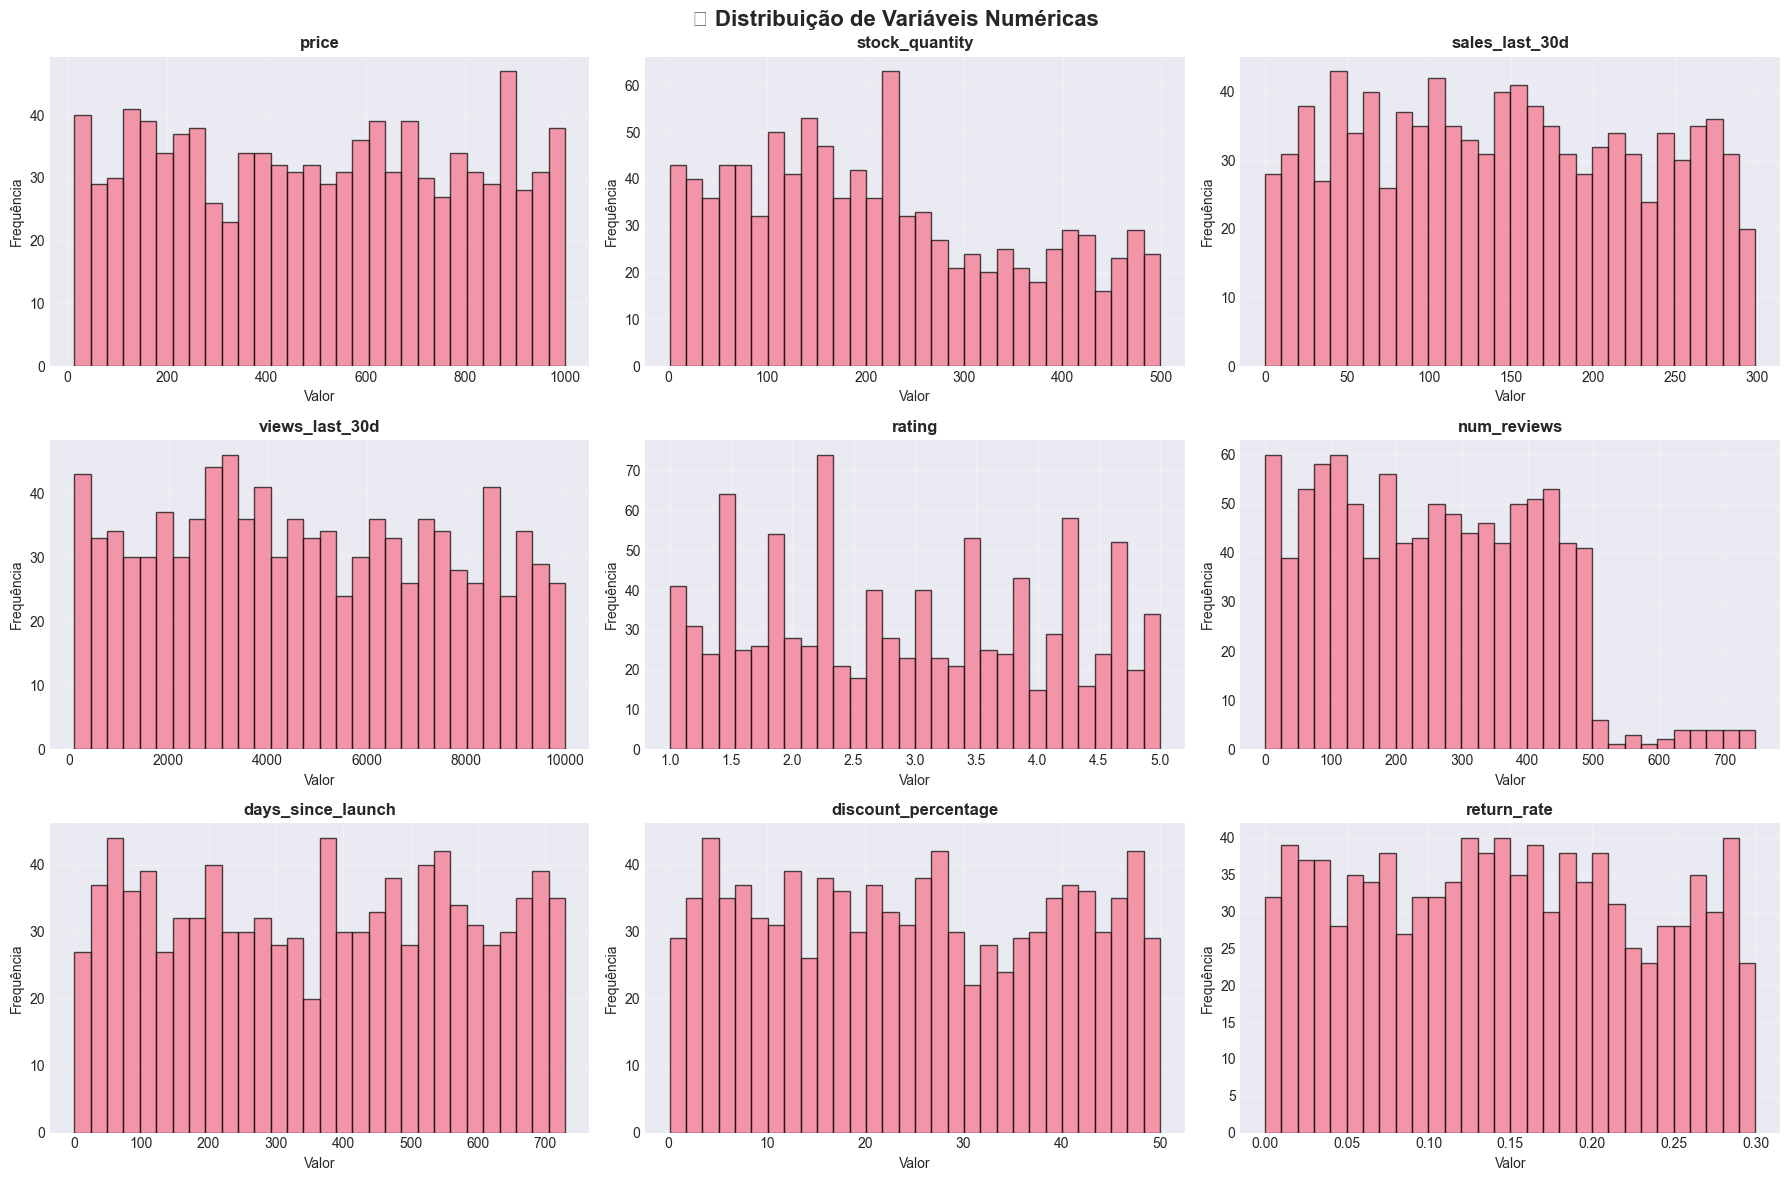

In [8]:
# Distribuição de variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['product_id']]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('📊 Distribuição de Variáveis Numéricas', fontsize=16, fontweight='bold')

for idx, col in enumerate(numeric_cols[:9]):
    row = idx // 3
    col_idx = idx % 3
    
    axes[row, col_idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(col, fontweight='bold')
    axes[row, col_idx].set_xlabel('Valor')
    axes[row, col_idx].set_ylabel('Frequência')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# Distribuição de categorias
if 'category' in df.columns:
    category_counts = df['category'].value_counts()
    
    fig = px.bar(
        x=category_counts.index,
        y=category_counts.values,
        title='📦 Distribuição de Produtos por Categoria',
        labels={'x': 'Categoria', 'y': 'Número de Produtos'},
        color=category_counts.values,
        color_continuous_scale='Viridis'
    )
    fig.update_layout(height=500, showlegend=False)
    fig.show()
    
    print(f"\n📊 Total de categorias: {len(category_counts)}")
    print(f"📦 Categoria mais comum: {category_counts.index[0]} ({category_counts.values[0]} produtos)")


📊 Total de categorias: 8
📦 Categoria mais comum: Esportes (146 produtos)


## 4️⃣ Análise de Correlações

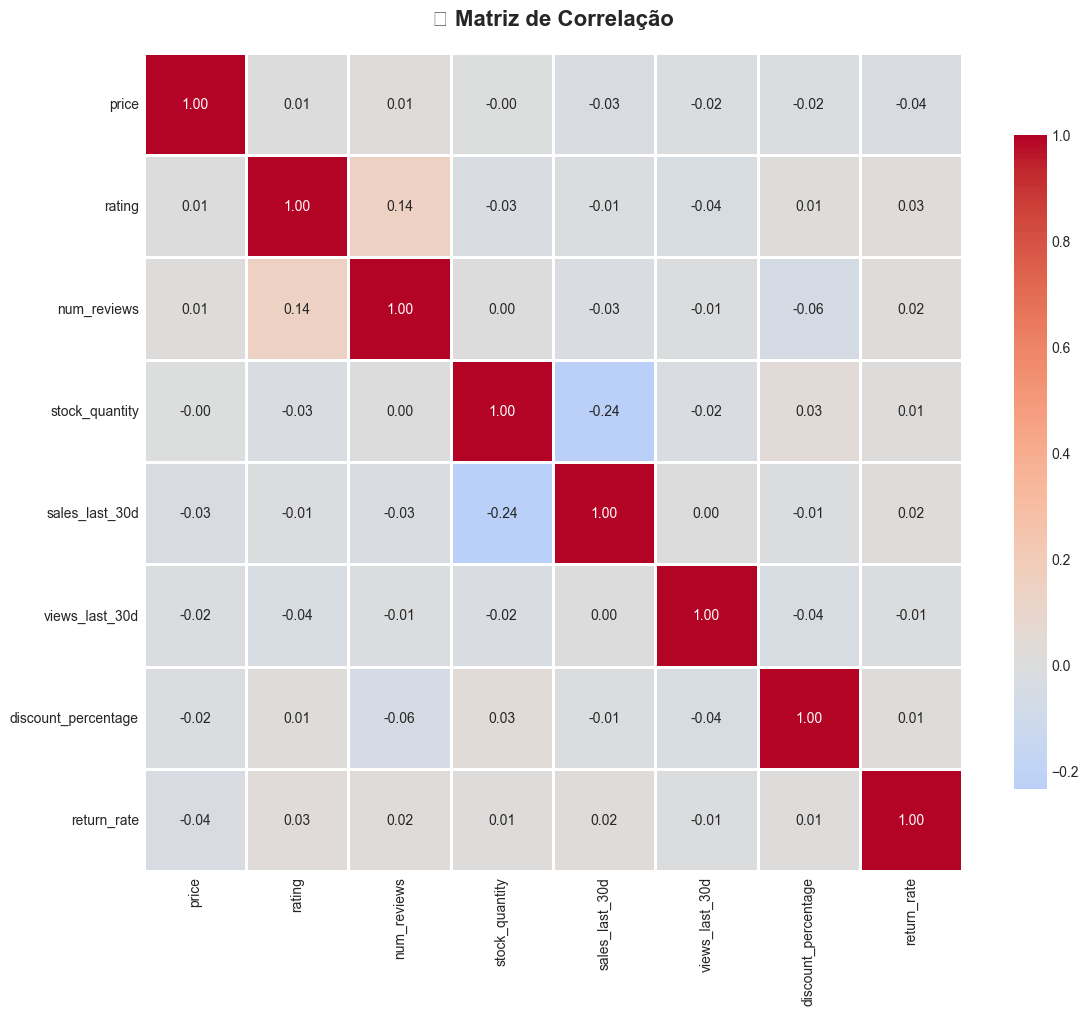


🔝 Top 10 Correlações (em módulo):
stock_quantity       sales_last_30d         0.236429
sales_last_30d       stock_quantity         0.236429
rating               num_reviews            0.138348
num_reviews          rating                 0.138348
                     discount_percentage    0.056748
discount_percentage  num_reviews            0.056748
views_last_30d       discount_percentage    0.040112
discount_percentage  views_last_30d         0.040112
views_last_30d       rating                 0.039832
rating               views_last_30d         0.039832
dtype: float64


In [10]:
# Matriz de correlação
correlation_cols = ['price', 'rating', 'num_reviews', 'stock_quantity', 
                   'sales_last_30d', 'views_last_30d', 'discount_percentage', 'return_rate']
correlation_cols = [col for col in correlation_cols if col in df.columns]

corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)
plt.title('🔥 Matriz de Correlação', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlações
print("\n🔝 Top 10 Correlações (em módulo):")
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1.0]
corr_pairs = corr_pairs.abs().sort_values(ascending=False)
print(corr_pairs.head(10))

## 5️⃣ Análise de Performance de Produtos

In [11]:
# Scatter: Preço vs Vendas
fig = px.scatter(
    df,
    x='price',
    y='sales_last_30d',
    color='rating',
    size='num_reviews',
    hover_data=['product_id', 'category'],
    title='💰 Preço vs Vendas (colorido por Rating)',
    labels={'price': 'Preço ($)', 'sales_last_30d': 'Vendas (30 dias)'},
    color_continuous_scale='RdYlGn'
)
fig.update_layout(height=600)
fig.show()

In [12]:
# Taxa de conversão
df['conversion_rate'] = df['sales_last_30d'] / df['views_last_30d'].replace(0, 1)

fig = px.histogram(
    df,
    x='conversion_rate',
    nbins=50,
    title='�� Distribuição da Taxa de Conversão',
    labels={'conversion_rate': 'Taxa de Conversão'},
    color_discrete_sequence=['#636EFA']
)
fig.add_vline(
    x=df['conversion_rate'].median(),
    line_dash="dash",
    line_color="red",
    annotation_text=f"Mediana: {df['conversion_rate'].median():.3f}"
)
fig.update_layout(height=500)
fig.show()

print(f"\n📊 Taxa de Conversão Média: {df['conversion_rate'].mean():.3f}")
print(f"📊 Taxa de Conversão Mediana: {df['conversion_rate'].median():.3f}")


📊 Taxa de Conversão Média: 0.073
📊 Taxa de Conversão Mediana: 0.030


## 6️⃣ Análise por Categoria

In [13]:
# Performance por categoria
if 'category' in df.columns:
    category_stats = df.groupby('category').agg({
        'price': 'mean',
        'rating': 'mean',
        'sales_last_30d': 'sum',
        'stock_quantity': 'sum',
        'product_id': 'count'
    }).round(2)
    
    category_stats.columns = ['Preço Médio', 'Rating Médio', 'Vendas Totais', 'Estoque Total', 'Nº Produtos']
    category_stats = category_stats.sort_values('Vendas Totais', ascending=False)
    
    print("📊 Performance por Categoria:")
    display(category_stats)
    
    # Visualização
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Vendas por Categoria', 'Rating Médio', 'Preço Médio', 'Estoque Total')
    )
    
    fig.add_trace(
        go.Bar(x=category_stats.index, y=category_stats['Vendas Totais'], name='Vendas'),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Bar(x=category_stats.index, y=category_stats['Rating Médio'], name='Rating'),
        row=1, col=2
    )
    
    fig.add_trace(
        go.Bar(x=category_stats.index, y=category_stats['Preço Médio'], name='Preço'),
        row=2, col=1
    )
    
    fig.add_trace(
        go.Bar(x=category_stats.index, y=category_stats['Estoque Total'], name='Estoque'),
        row=2, col=2
    )
    
    fig.update_layout(height=800, showlegend=False, title_text="📊 Análise Completa por Categoria")
    fig.show()

📊 Performance por Categoria:


,Preço Médio,Rating Médio,Vendas Totais,Estoque Total,Nº Produtos
category,,,,,
Brinquedos,490.03,2.77,20562,30035,134
Esportes,525.21,3.12,20493,29825,146
Eletrônicos,460.48,2.85,19157,29242,133
Livros,524.36,3.03,17744,26571,125
Casa e Decoração,513.15,3.04,17674,24611,113
Alimentos,490.15,2.78,17335,25263,119
Moda,503.69,2.76,17207,25260,117
Beleza,534.32,2.95,15433,25664,113


## 7️⃣ Feature Engineering

In [14]:
from src.pipeline.data_processing import DataProcessor

# Processar dados
processor = DataProcessor()
processed_df, features = processor.process_pipeline(df, is_training=True)

print(f"✅ Features criadas: {len(features)}")
print(f"\n📋 Lista de features:")
for i, feat in enumerate(features, 1):
    print(f"{i:2d}. {feat}")

INFO:src.pipeline.data_processing:Creating engineered features...
INFO:src.pipeline.data_processing:Created 29 total features
INFO:src.pipeline.data_processing:Creating target variable...
INFO:src.pipeline.data_processing:Target distribution:
lifecycle_action
0     37
1    746
2    217
Name: count, dtype: int64
INFO:src.pipeline.data_processing:Target percentages:
lifecycle_action
0     3.7
1    74.6
2    21.7
Name: count, dtype: float64
INFO:src.pipeline.data_processing:Preparing features for modeling...
INFO:src.pipeline.data_processing:Selected 22 features for modeling
INFO:src.pipeline.data_processing:Fitted and transformed features
INFO:src.pipeline.data_processing:Processing pipeline completed


✅ Features criadas: 22

📋 Lista de features:
 1. price
 2. stock_quantity
 3. sales_last_30d
 4. views_last_30d
 5. rating
 6. num_reviews
 7. days_since_launch
 8. discount_percentage
 9. return_rate
10. conversion_rate
11. stock_coverage_days
12. revenue_last_30d
13. review_engagement_rate
14. price_competitiveness
15. performance_score
16. sales_velocity
17. discount_impact
18. rating_quality
19. category_encoded
20. age_category_encoded
21. stock_status_encoded
22. price_tier_encoded


In [15]:
# Visualizar features criadas
print("\n📊 Primeiras linhas do dataset processado:")
display(processed_df[features].head())


📊 Primeiras linhas do dataset processado:


,price,stock_quantity,sales_last_30d,views_last_30d,rating,num_reviews,days_since_launch,discount_percentage,return_rate,conversion_rate,stock_coverage_days,revenue_last_30d,review_engagement_rate,price_competitiveness,performance_score,sales_velocity,discount_impact,rating_quality,category_encoded,age_category_encoded,stock_status_encoded,price_tier_encoded
0,0.680281,0.623742,0.443565,0.964123,-0.440744,-0.788015,-1.387677,-0.303378,-0.236515,-0.301275,-0.181754,0.882075,-0.219188,5.139244,-0.300445,0.203400,0.039833,-0.502857,-1.577459,1.223522,-0.356411,1.341641
1,0.124621,1.676180,-0.469780,0.548063,-0.184149,-0.775424,0.690300,1.480268,1.737187,-0.348108,-0.011041,-0.245227,-0.193617,-0.282509,-0.360810,-0.188558,0.411959,-0.293892,0.643689,0.000000,-0.356411,1.341641
2,-0.652243,1.705014,-0.742597,1.085430,1.098823,-1.071318,-0.929024,0.739369,-1.000150,-0.385554,0.069812,-0.738317,-0.204396,-0.380187,-0.373320,-0.142018,-0.199869,0.468157,1.087918,1.223522,-0.356411,0.447214
3,1.076765,-0.082688,1.226432,-0.069111,-0.697338,1.056599,0.011682,-0.262216,-0.941409,-0.120859,-0.236832,2.069491,-0.171514,-0.157130,-0.112956,-0.113229,0.504390,-0.361263,-1.577459,-1.223522,-0.356411,-0.447214
4,0.634218,-0.724243,-1.489879,-0.912583,-1.124995,1.428040,-0.535893,0.080792,-0.671200,-0.396114,0.092451,-0.936889,0.905174,-0.359402,-0.425496,-0.208904,-0.957440,-0.753001,-0.244770,-1.223522,-0.356411,1.341641


In [16]:
# Distribuição da variável target
if 'lifecycle_action' in processed_df.columns:
    target_dist = processed_df['lifecycle_action'].value_counts()
    
    fig = px.pie(
        values=target_dist.values,
        names=target_dist.index,
        title='🎯 Distribuição da Variável Target (Lifecycle Action)',
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(height=500)
    fig.show()
    
    print("\n📊 Contagem por ação:")
    print(target_dist)
    print(f"\n⚖️ Balanceamento: {target_dist.min() / target_dist.max():.2%}")


📊 Contagem por ação:
lifecycle_action
1    746
2    217
0     37
Name: count, dtype: int64

⚖️ Balanceamento: 4.96%


## 8️⃣ Insights e Conclusões

In [18]:
print("="*80)
print("📊 RESUMO DA ANÁLISE EXPLORATÓRIA")
print("="*80)

print(f"\n1️⃣ DADOS:")
print(f"   • Total de produtos: {len(df):,}")
print(f"   • Categorias: {df['category'].nunique() if 'category' in df.columns else 'N/A'}")
# print(f"   • Período: {df['launch_date'].min()} até {df['launch_date'].max()}")

print(f"\n2️⃣ PERFORMANCE:")
print(f"   • Receita total (30d): ${(df['price'] * df['sales_last_30d']).sum():,.2f}")
print(f"   • Vendas totais (30d): {df['sales_last_30d'].sum():,}")
print(f"   • Rating médio: {df['rating'].mean():.2f} ⭐")
print(f"   • Taxa de conversão média: {df['conversion_rate'].mean():.3f}")

print(f"\n3️⃣ ESTOQUE:")
print(f"   • Valor total em estoque: ${(df['price'] * df['stock_quantity']).sum():,.2f}")
print(f"   • Produtos sem estoque: {(df['stock_quantity'] == 0).sum()}")
print(f"   • Estoque médio: {df['stock_quantity'].mean():.0f} unidades")

print(f"\n4️⃣ FEATURES:")
print(f"   • Features criadas: {len(features)}")
print(f"   • Variável target: lifecycle_action")
print(f"   • Classes: {processed_df['lifecycle_action'].nunique() if 'lifecycle_action' in processed_df.columns else 'N/A'}")

print("\n" + "="*80)
print("✅ Análise exploratória concluída!")
print("📌 Próximo passo: Treinamento do modelo (notebook 02)")
print("="*80)

📊 RESUMO DA ANÁLISE EXPLORATÓRIA

1️⃣ DADOS:
   • Total de produtos: 1,000
   • Categorias: 8

2️⃣ PERFORMANCE:
   • Receita total (30d): $72,762,850.72
   • Vendas totais (30d): 145,605
   • Rating médio: 2.92 ⭐
   • Taxa de conversão média: 0.073

3️⃣ ESTOQUE:
   • Valor total em estoque: $109,194,768.58
   • Produtos sem estoque: 0
   • Estoque médio: 216 unidades

4️⃣ FEATURES:
   • Features criadas: 22
   • Variável target: lifecycle_action
   • Classes: 3

✅ Análise exploratória concluída!
📌 Próximo passo: Treinamento do modelo (notebook 02)


---

## 💾 Salvar Dados Processados

In [ ]:
# Salvar dados processados
output_path = Path.cwd().parent / 'data' / 'processed' / 'products_processed.csv'
output_path.parent.mkdir(parents=True, exist_ok=True)

processed_df.to_csv(output_path, index=False)
print(f"✅ Dados processados salvos em: {output_path}")